In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"D:\machine learning\datasets\enhanced_house_price_dataset.csv")
data.head()


,Area,Bedrooms,Bathrooms,Stories,Parking,Age,City,Furnishing,Main Road,Guest Room,Basement,Water Supply,Air Conditioning,Preferred Tenant,Locality Rating,Price
0,1260,4,3,2,1,24,Pune,Semi-Furnished,Yes,Yes,Yes,Both,No,Company,4,1274350
1,5790,2,1,1,1,7,Kolkata,Unfurnished,Yes,Yes,Yes,Both,Yes,Bachelor,5,1094846
2,5626,5,2,3,0,15,Chennai,Semi-Furnished,No,Yes,Yes,Corporation,Yes,Company,6,1495933
3,5591,1,1,1,1,47,Delhi,Furnished,Yes,No,Yes,Borewell,No,Company,3,1003442
4,4172,5,1,1,1,44,Delhi,Unfurnished,No,No,No,Borewell,Yes,Bachelor,1,1306676


In [2]:
df=data[['Area','Bedrooms','Stories','Parking','Age','Locality Rating','Price']]
df_X=df[['Area','Bedrooms','Stories','Parking','Age','Locality Rating']]
df_Y=df['Price']

In [3]:
df.head(1)

,Area,Bedrooms,Stories,Parking,Age,Locality Rating,Price
0,1260,4,2,1,24,4,1274350


In [4]:
#scaling
df_X_scaled=df_X.copy()
for col in df_X:
    df_X_scaled[col]= ((df_X_scaled[col]-df_X_scaled[col].mean())/df_X_scaled[col].std())
df_Y_scaled=((df_Y-df_Y.mean())/df_Y.std())

In [5]:
#cost calculation
def cost_find(y_pred,y_orig):
    m=y_pred.size
    return (1/(2*m) * ((y_pred-y_orig)**2).sum())
#partial derivative
def deriv(y_pred,y_orig,var):
    m= y_pred.size
    return 1/m * ((y_pred-y_orig) *var).sum()

def gradient(y_pred,y_orig,var,w,lr):
  return w- (lr*deriv(y_pred,y_orig,var))
    

In [87]:
#multi linear regression
#initial values
b=0
cost=list()
m=[0,0,0,0,0,0]
y=b
lr=0.01
#_____________________________________________________________
for j in range(0,10000):
    y=0
    for i,col in enumerate(df_X_scaled):
       y+= df_X_scaled[col]*m[i]
    y+=b
    
    cost.append(cost_find(y,df_Y_scaled))
    
    for i,col in enumerate(df_X_scaled):
        m[i]=gradient(y,df_Y_scaled,df_X_scaled[col],m[i],lr)
    b=gradient(y,df_Y_scaled,1,b,lr)
    if len(cost) > 2 and abs(cost[-1] - cost[-2]) < 0.00001:
        break


In [76]:
print(m)
print(b)

[np.float64(-0.0003298954471114156), np.float64(-0.0003794688978670131), np.float64(0.0004770109026078525), np.float64(0.001606535011777694), np.float64(-0.0006894857736377191), np.float64(-0.0008223704410757738)]
-2.8943492047517355e-17


In [6]:
import numpy as np

X = df_X_scaled.values      # shape (m, n)
y_true = df_Y_scaled.values # shape (m, 1)
m_weights = np.zeros(X.shape[1])
b = 0
lr = 0.01
cost = []

for iteration in range(10000):
    # Prediction
    y_pred = X.dot(m_weights) + b  # vectorized
    
    # Compute cost
    current_cost = np.sum((y_pred - y_true.flatten())**2) / (2*X.shape[0])
    cost.append(current_cost)
    
    # Gradients
    grad_w = X.T.dot(y_pred - y_true.flatten()) / X.shape[0]
    grad_b = np.mean(y_pred - y_true.flatten())
    
    # Update
    m_weights -= lr * grad_w
    b -= lr * grad_b
    
    # Stopping condition
    if iteration > 1 and abs(cost[-1] - cost[-2]) < 1e-6:
        break


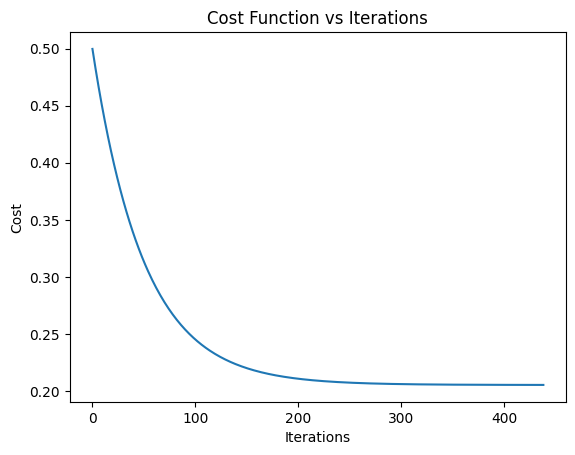

In [7]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.show()


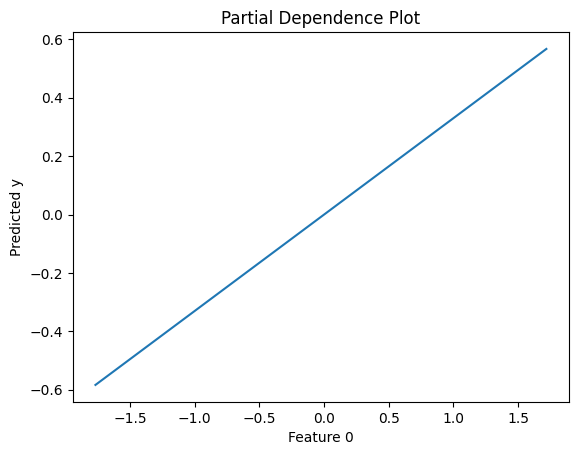

In [9]:
import numpy as np
import matplotlib.pyplot as plt

feature_index = 0  # index of feature you want to analyze

X_temp = X.copy()
feature_values = np.linspace(X[:, feature_index].min(),
                             X[:, feature_index].max(), 100)

pdp_values = []

for val in feature_values:
    X_temp[:, feature_index] = val
    y_temp = X_temp.dot(m_weights) + b   # your model
    pdp_values.append(np.mean(y_temp))

plt.plot(feature_values, pdp_values)
plt.xlabel(f"Feature {feature_index}")
plt.ylabel("Predicted y")
plt.title("Partial Dependence Plot")
plt.show()


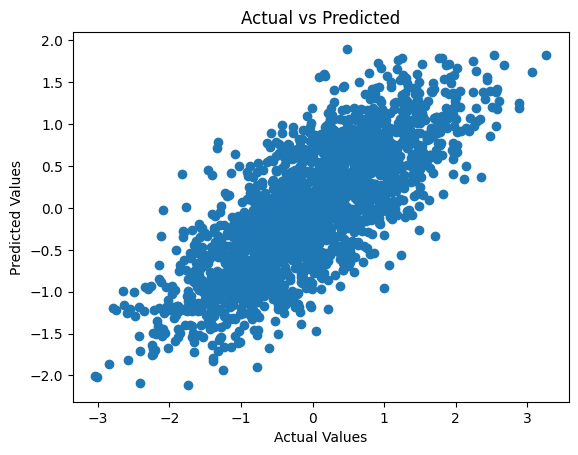

In [10]:
plt.scatter(y_true, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


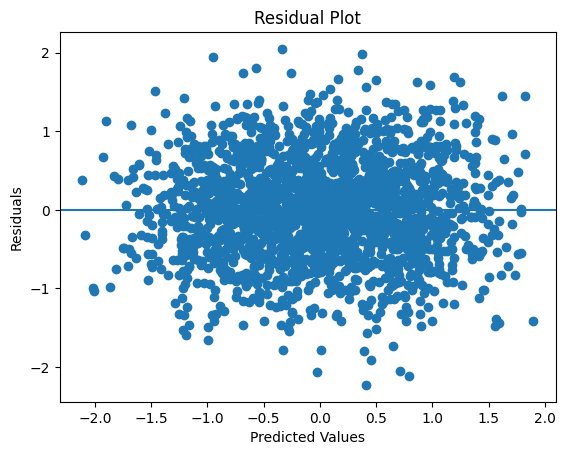

In [11]:
residuals = y_true - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [74]:
del cost